In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
import yfinance

from rfcorr.random_forest import get_corr, get_pairwise_corr

In [2]:
rs = numpy.random.RandomState(42)

In [3]:
# fetch all symbols
symbol_list = ["SPY",
              "XLB",
              "XLE",
              "XLF",
               "XLI",
               "XLK",
               "XLP",
               "XLU",
               "XLV",
               "XLRE",
              ]

symbol_df = yfinance.download(symbol_list, progress=False)
symbol_df = symbol_df.dropna(axis=0)
print(symbol_df.shape)

(1600, 60)


In [4]:
close_close_ret_df = numpy.log(symbol_df.loc[:, "Adj Close"]).diff().iloc[1:]
close_close_ret_df.tail()

,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV
Date,,,,,,,,,,
2022-02-08,0.008194,0.015357,-0.021731,0.013827,0.009932,0.012287,0.003807,-0.009034,0.000731,0.008144
2022-02-09,0.014530,0.021554,0.008313,0.006355,0.013643,0.021938,0.000262,0.023912,0.004375,0.007706
2022-02-10,-0.018129,-0.005843,-0.006265,-0.008811,-0.016513,-0.026497,-0.010800,-0.028895,-0.025643,-0.015774
2022-02-11,-0.019916,-0.015592,0.028670,-0.014111,-0.015380,-0.031020,-0.003582,-0.013775,0.000597,-0.013952
2022-02-14,-0.003275,-0.008248,-0.023859,-0.011283,-0.003731,-0.000323,-0.002795,-0.010847,-0.008540,-0.010264


In [5]:
ret_corr_classification_df = pandas.DataFrame(get_pairwise_corr(close_close_ret_df.values, num_trees=1000, lag=0, method="classification", random_state=rs),
                                                columns=close_close_ret_df.columns,
                                                index=close_close_ret_df.columns)
ret_corr_classification_df

,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV
SPY,1.000000,0.121723,0.047575,0.117811,0.164804,0.351296,0.043706,0.036459,0.023867,0.092758
XLB,0.200377,1.000000,0.097803,0.117565,0.273105,0.076573,0.061291,0.052106,0.051544,0.069635
XLE,0.119339,0.161264,1.000000,0.178103,0.166990,0.085879,0.073228,0.069760,0.070075,0.075363
XLF,0.219856,0.123698,0.114184,1.000000,0.223214,0.082387,0.056944,0.054599,0.055803,0.069316
XLI,0.213653,0.254661,0.090920,0.171902,1.000000,0.070827,0.052724,0.044914,0.044271,0.056127
XLK,0.413984,0.081580,0.062978,0.077323,0.100168,1.000000,0.056473,0.047874,0.045832,0.113787
XLP,0.160580,0.085089,0.065267,0.069025,0.097941,0.073986,1.000000,0.167700,0.181708,0.098704
XLRE,0.123903,0.076260,0.072157,0.072315,0.081941,0.088804,0.186241,1.000000,0.209701,0.088679
XLU,0.085813,0.076344,0.076660,0.085006,0.075648,0.074409,0.198028,0.240237,1.000000,0.087854
XLV,0.266151,0.092930,0.078260,0.086622,0.102910,0.147988,0.090174,0.068782,0.066184,1.000000


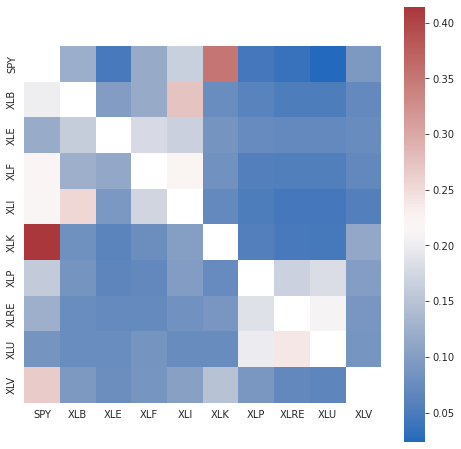

In [6]:
with seaborn.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    for i in range(ret_corr_classification_df.shape[0]):
        ret_corr_classification_df.values[i, i] = numpy.nan
    ax = seaborn.heatmap(ret_corr_classification_df, square=True, cmap="vlag")

In [7]:
ret_corr_regression_df = pandas.DataFrame(get_pairwise_corr(close_close_ret_df.values, num_trees=1000, lag=0, method="regression", random_state=rs),
                                                columns=close_close_ret_df.columns,
                                                index=close_close_ret_df.columns)
ret_corr_regression_df

,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV
SPY,1.000000,0.037385,0.010118,0.048852,0.142654,0.634812,0.023850,0.025492,0.013390,0.063448
XLB,0.106043,1.000000,0.048973,0.078588,0.617913,0.028888,0.024826,0.038891,0.030087,0.025791
XLE,0.072897,0.180950,1.000000,0.375685,0.136296,0.047869,0.034990,0.060094,0.042027,0.049192
XLF,0.127084,0.075438,0.055861,1.000000,0.595423,0.033771,0.018329,0.048831,0.020714,0.024550
XLI,0.368973,0.314176,0.026730,0.169909,1.000000,0.019052,0.015184,0.050779,0.012133,0.023063
XLK,0.815056,0.018506,0.016821,0.044467,0.025632,1.000000,0.026836,0.019573,0.013078,0.020030
XLP,0.305879,0.035394,0.025306,0.034736,0.043800,0.088793,1.000000,0.104738,0.202584,0.158770
XLRE,0.167912,0.090920,0.033420,0.073589,0.101871,0.037354,0.089316,1.000000,0.358186,0.047431
XLU,0.042713,0.099368,0.043232,0.048102,0.030113,0.034554,0.192283,0.443627,1.000000,0.066009
XLV,0.669167,0.035698,0.032765,0.036985,0.036006,0.059627,0.064916,0.031661,0.033174,1.000000


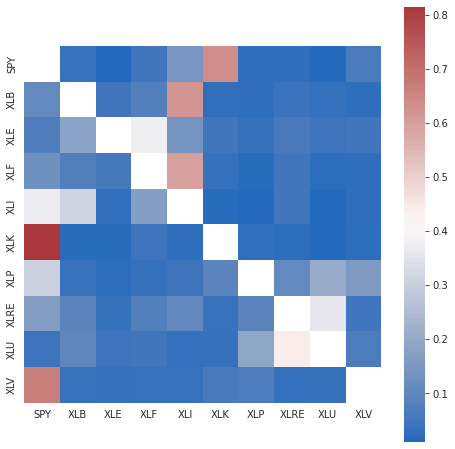

In [8]:
with seaborn.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    for i in range(ret_corr_regression_df.shape[0]):
        ret_corr_regression_df.values[i, i] = numpy.nan
    ax = seaborn.heatmap(ret_corr_regression_df, square=True, cmap="vlag")

In [9]:
ret_lag_corr_classification_df = pandas.DataFrame(get_pairwise_corr(close_close_ret_df.values, num_trees=1000, lag=1, method="classification", random_state=rs),
                                                columns=close_close_ret_df.columns,
                                                index=close_close_ret_df.columns)
ret_lag_corr_classification_df

,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV
SPY,1.000000,0.109776,0.116626,0.112716,0.110250,0.113258,0.106694,0.109027,0.109417,0.112234
XLB,0.107253,1.000000,0.112806,0.112051,0.116020,0.109901,0.108749,0.108827,0.111833,0.112560
XLE,0.106956,0.112070,1.000000,0.114715,0.111096,0.108471,0.110323,0.115218,0.110230,0.110920
XLF,0.105987,0.109693,0.110754,1.000000,0.111271,0.109896,0.108581,0.117556,0.112889,0.113373
XLI,0.106150,0.109996,0.112643,0.111260,1.000000,0.113472,0.109270,0.107957,0.112120,0.117132
XLK,0.111386,0.110770,0.116275,0.111778,0.107083,1.000000,0.105037,0.113587,0.110311,0.113773
XLP,0.109152,0.112457,0.118926,0.114008,0.109207,0.103020,1.000000,0.111666,0.111782,0.109781
XLRE,0.105998,0.110408,0.118000,0.109230,0.105066,0.112495,0.110919,1.000000,0.114964,0.112921
XLU,0.105277,0.112675,0.125651,0.107333,0.110720,0.105069,0.108487,0.112397,1.000000,0.112391
XLV,0.105888,0.110804,0.114911,0.108046,0.109384,0.112918,0.112428,0.110345,0.115276,1.000000


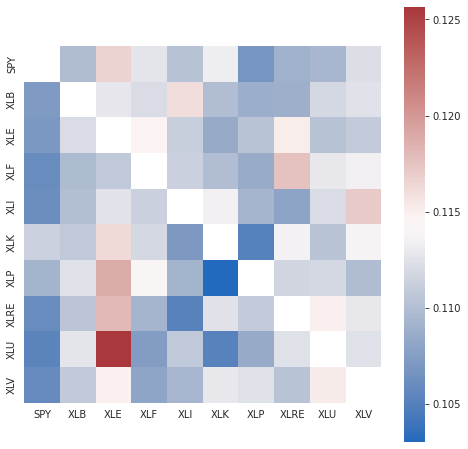

In [10]:
with seaborn.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    for i in range(ret_lag_corr_classification_df.shape[0]):
        ret_lag_corr_classification_df.values[i, i] = numpy.nan
    ax = seaborn.heatmap(ret_lag_corr_classification_df, square=True, cmap="vlag")

In [11]:
ret_lag_corr_regression_df = pandas.DataFrame(get_pairwise_corr(close_close_ret_df.values, num_trees=1000, lag=1, method="regression", random_state=rs),
                                                columns=close_close_ret_df.columns,
                                                index=close_close_ret_df.columns)
ret_lag_corr_regression_df

,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV
SPY,1.000000,0.101977,0.123207,0.094929,0.084739,0.109335,0.147743,0.085339,0.136512,0.116220
XLB,0.078313,1.000000,0.131239,0.098477,0.093055,0.101260,0.152671,0.092149,0.119453,0.133383
XLE,0.084238,0.097981,1.000000,0.155455,0.132857,0.092787,0.139566,0.092565,0.103339,0.101212
XLF,0.071304,0.106363,0.127611,1.000000,0.089753,0.091182,0.166937,0.096497,0.123815,0.126538
XLI,0.076136,0.107632,0.112682,0.098604,1.000000,0.094052,0.154629,0.097189,0.126747,0.132329
XLK,0.100206,0.106363,0.117094,0.110361,0.087558,1.000000,0.118883,0.103663,0.125332,0.130540
XLP,0.089575,0.086099,0.114122,0.110147,0.103518,0.111620,1.000000,0.105679,0.167249,0.111991
XLRE,0.071613,0.099001,0.113752,0.109135,0.086762,0.103625,0.153535,1.000000,0.138475,0.124101
XLU,0.077755,0.098224,0.125497,0.103354,0.093891,0.099129,0.161673,0.111966,1.000000,0.128510
XLV,0.083926,0.104940,0.134065,0.107569,0.098253,0.096487,0.123854,0.099654,0.151251,1.000000


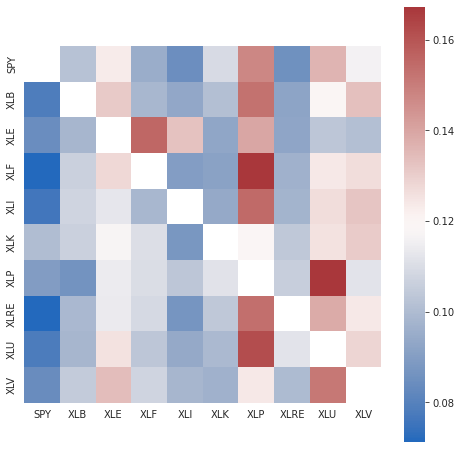

In [12]:
with seaborn.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    for i in range(ret_lag_corr_regression_df.shape[0]):
        ret_lag_corr_regression_df.values[i, i] = numpy.nan
    ax = seaborn.heatmap(ret_lag_corr_regression_df, square=True, cmap="vlag")

In [13]:
v, h = numpy.linalg.eigh(ret_lag_corr_regression_df)
numpy.abs(v)

LinAlgError: Eigenvalues did not converge

In [ ]:
ret_pearson_corr_df = close_close_ret_df.corr(method="pearson")
ret_pearson_corr_df

In [ ]:
with seaborn.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    for i in range(ret_pearson_corr_df.shape[0]):
        ret_pearson_corr_df.values[i, i] = numpy.nan
    ax = seaborn.heatmap(ret_pearson_corr_df, square=True, cmap="vlag")

In [ ]:
ret_spearman_corr_df = close_close_ret_df.corr(method="spearman")

In [ ]:
with seaborn.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    for i in range(ret_spearman_corr_df.shape[0]):
        ret_spearman_corr_df.values[i, i] = numpy.nan
    ax = seaborn.heatmap(ret_spearman_corr_df, square=True, cmap="vlag")